In [2]:
## https://www.kaggle.com/code/yassinealouini/working-with-tiff-files
import time
placenta655 = "G:\placenta2\wsi\elso.tiff"
e412 = "G:\echinov3\wsi-remaining\echino41.tif"



In [ ]:
# numpy
import numpy as np

start_time = time.time()

# this does not work, what Image is??
np.array(np.Image.open(placenta655))

time_elapsed = time.time() - start_time
print('tiff opened in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

c:\Users\mazsolamacko\anaconda3\envs\pathml\lib\site-packages\rasterio\__init__.py:331: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


torch.Size([1251, 3, 3685])
[{'min': 0, 'mean': 190.14335993891453, 'median': 212.0, 'max': 255}, {'min': 0, 'mean': 167.29593041984322, 'median': 210.0, 'max': 255}, {'min': 0, 'mean': 187.08485477560964, 'median': 211.0, 'max': 255}]


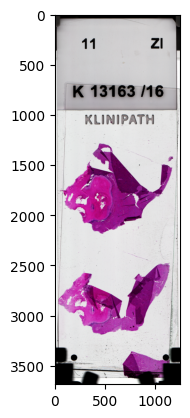

<Axes: >

In [4]:
# rasterio - okay for echinos, but never loads the new big file / OOM
from torchvision.transforms import ToTensor
import rasterio
from rasterio.plot import show
import numpy as np

with rasterio.open(e412) as image:
    image_array = image.read()
   
torch_image = ToTensor()(image_array)
print(torch_image.shape)

stats = []

for band in image_array:
    stats.append({
    'min': band.min(),
    'mean': band.mean(),
    'median': np.median(band),
    'max': band.max()})

print(stats)

show(image_array)

In [ ]:
# opens the big file as well!

import tifffile

image = tifffile.imread(path)

print(image.shape)